<a href="https://colab.research.google.com/github/wonyoung-ji/statistics/blob/master/study/201027_13%EC%9E%A5_%EB%B6%84%EB%A5%98%EC%98%88%EC%B8%A1%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# 분류예측분석

# 1.분류예측분석 기초
- 분류예측
  - 관찰 개체들을 몇 개의 집단으로 분류할지 예측할 때 사용
    + ex) 현재 구매고객들 중 누가 향후 6개월 이내에 휴면 or 이탈고객으로 전환될 것인가?
  - 대부분 종속변수 = 명목형 척도
  - 대표적으로 선형판별분석과 로지스틱 회귀분석 존재
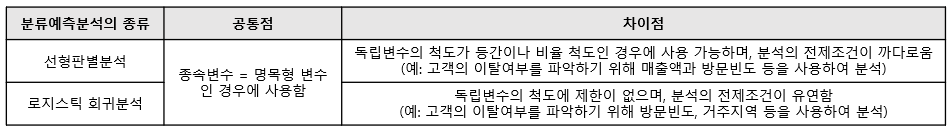

- __분류예측의 정확도 평가__
  - 목표집단으로 예측된 관측치와, 실제 해당 집단에 속한 관측치가 정리된 __분류행렬표__를 작성하여 평가
  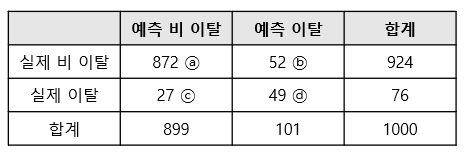

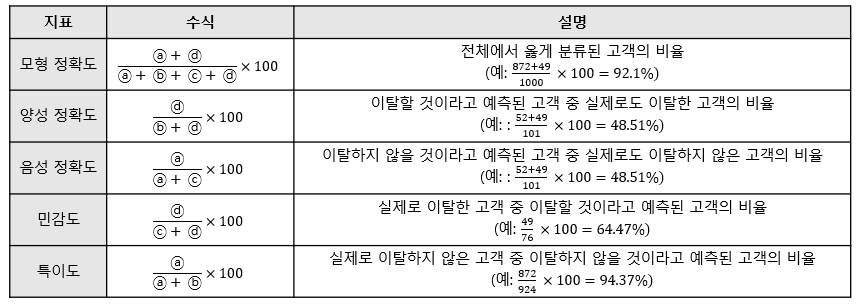

# 2.선형판별분석

## 2.1.개념 및 주요 이론
- __선형판별분석__
  - 이미 분류되어 있는 집단 사이의 차이를 설명할 수 있는 독립변수를 찾아내고,  
이 __변수들의 선형결합으로 이루어진 판별식 or 판별함수__를 통해 집단을 분류 예측할 수 있는 다변량 통계분석 기법
  - 제약사항: __독립변수가 등간 or 비율척도로만 구성__되어야 함
  - 전제조건이 만족되면 우수한 판별력, 사용자가 판별모형을 쉽게 이해 가능


- __선형판별식__
  - 선형판별식을 이용해 선형판별분석 수행
  - 선형판별식: 두 개 이상의 집단을 구분하는데 있어 분류오류를 최소화 할 수 있는 독립변수들의 함수적인 선형결합 모형
  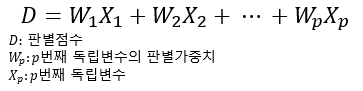

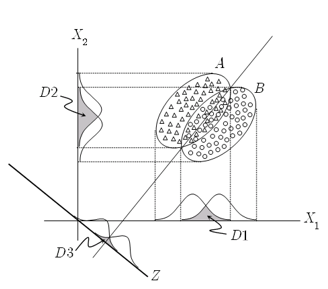

- image.png과 image.png를 이용하여 그룹 A와 B를 효과적으로 분류하기 어렵다.
- Z라는 새로운 차원을 생성한다면 보다 효과적으로 분류할 수 있다.
- 즉, 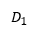과 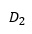 에 비해 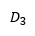의 면적은 상당히 작다.
- 선형판별분석 = 개별독립변수들의 조합으로 주어진 __집단을 효과적으로 분류할 수 있는 새로운 가상의 축 (기준)을 형성__하는 과정
- 그러나 실제로는, 위 처럼 A집단과 B집단을 나누는 하나의 판별식을 도출하는 것이 아니라,  
 각 집단에 적용되는 판별식을 하나씩 각각 산출하여 각 판별식에 의한 판별점수를 비교하여 집단을 분류  
- 예: A집단과 B집단에 해당하는 판별식을 각각 만들고,  
한 사례(예: 고객)에 대해 두 개의 판별점수 도출 후 A 판별점수 > B 판별점수 일 경우 A 집단으로 판별

- __선형판별분석을 위한 전제조건__
 - ① __독립변수는 정규분포를 따라야 한다.__
   + 독립변수가 정규성을 띄지 않는 경우, 선형판별식의 예측 정확도는 낮을 뿐만 아니라, 분석 모형 자체가 유의하지 않음
  - ② __종속변수와 독립변수는 상관관계를 가져야 한다__
  - ③ __독립변수들 사이에 상관관계가 없거나 작아야 한다.__
    + 다중회귀분석처럼, 독립변수간 상관관계가 높다면 다중공선성의 문제 발생
  - ④ __종속변수로 구분되는 각 집단 별 공분산 행렬이 유사해야 한다__
    + 공분산 행렬이 큰 집단이 판별모형에 영향을 많이 줌
  - 실제 실무적인 데이터에는 독립변수들이 정규분포를 따르지 않는 경우, 공분산 행렬이 유사하지 않는 경우도 많이 존재함
  - 이 때문에, 판별분석보다는 로지스틱 회귀분석이나 의사결정나무 선호

## 2.2.분석 및 해석
- 쇼핑몰은 고객이탈을 효과적으로 예측하고자 고객들의 거래이력 데이터 활용
- 독립변수 = 방문빈도, 1회 평균매출액, 거래기간
- 귀무가설 = 방문빈도와 1회 평균매출액, 거래기간은 이탈에 영향을 주지 않는다
- 연구가설 = 방문빈도와 1회 평균매출액, 거래기간은 이탈에 영향을 준다

In [3]:
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix
df = pd.read_csv('/content/gdrive/My Drive/통계/Ashopping.csv',sep=',',encoding='CP949')
df.head()

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,구매_카테고리_수,거주지역,성별,고객_나이대,거래기간,할인민감여부,멤버쉽_프로그램_가입전_만족도,멤버쉽_프로그램_가입후_만족도,Recency,Frequency,Monetary,상품_만족도,매장_만족도,서비스_만족도,상품_품질,상품_다양성,가격_적절성,상품_진열_위치,상품_설명_표시,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,6,6,1,4,1079,0,5,7,7,3,4,6,5,6,7,7,6,7.0,6.0,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,4,0,4,4,1,1,537,0,2,3,2,3,3,2,5,4,6,7,6,6.0,NaN,7,7,6,6,6,5,3,6,6,6
2,3,0,2680780,18,148932,6,186045,1,4,1,6,6,1,6,1080,0,6,6,7,3,2,4,6,7,6,7,6,7.0,NaN,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,4,1,5,5,1,6,1019,0,3,5,7,3,5,3,5,5,6,6,6,5.0,6.0,6,6,5,6,6,6,6,6,5,6
4,5,0,13745950,73,188301,9,246350,1,2,0,6,6,0,6,1086,0,5,6,7,6,7,5,6,6,5,6,6,5.0,6.0,5,6,6,6,5,5,6,6,5,6


- 분류행렬표 작성을 위해 sklearn.metrics의 confusion_matrix을 불러온다

In [ ]:
# 종속변수와 독립변수 구분하기
X = df[['방문빈도','1회_평균매출액','거래기간']]
Y = df['이탈여부']

In [ ]:
# 선형판별분석
lda = LDA().fit(X,Y)

- LDA()를 통해 선형판별분석 모형 구축
- fit(독립변수, 종속변수)를 통해 분석에 사용할 데이터를 적합

In [ ]:
# 예측결과
print('판별식 선형계수:', np.round(lda.coef_,10))
print('\n판별식 절편:',np.round(lda.intercept_,3))
print('\n예측결과:\n',pd.DataFrame(lda.predict(X)))
print('\n예측 스코어:',pd.DataFrame(lda.predict_proba(X)))
print('\n예측 정확도:',lda.score(X,Y))

판별식 선형계수: [[ 8.57912496e-02  1.02380000e-06 -9.61603449e-02]]

판별식 절편: [72.916]

예측결과:
      0
0    0
1    1
2    0
3    0
4    0
..  ..
995  0
996  0
997  0
998  0
999  0

[1000 rows x 1 columns]

예측 스코어:                 0             1
0    1.000000e+00  2.208135e-13
1    1.370801e-10  1.000000e+00
2    1.000000e+00  1.999582e-13
3    1.000000e+00  7.951807e-11
4    1.000000e+00  1.309479e-11
..            ...           ...
995  1.000000e+00  2.283614e-12
996  1.000000e+00  1.727200e-10
997  1.000000e+00  3.609038e-14
998  1.000000e+00  8.248046e-13
999  1.000000e+00  6.555998e-13

[1000 rows x 2 columns]

예측 정확도: 0.986


- 예측스코어 = 판별식에 의해 계산된 판별 점수

In [ ]:
# 분류행렬표 출력
cf_m = pd.DataFrame(confusion_matrix(Y,lda.predict(X)))
cf_m.columns=['예측 0', '예측 1']
cf_m.index = ['실제 0', '실제 1']
cf_m

,예측 0,예측 1
실제 0,921,12
실제 1,2,65


- confusion_matrix(종속변수, 예측결과)
- 분류행렬표를 통해 민감도, 특이도 등 계산 가능

- 선형판별식
 - D = 72.916 + (8.57912496e-02 * 방문빈도) + (1.02380000e-06 * 1회 평균매출액) - (9.61603449e-02 * 거래기간)
 

# 3.로지스틱 회귀분석


## 3.1.개념 및 주요 이론
- __판별분석의 단점__
  - 실제로 독립변수와 종속변수 간의 관계가 비선형적일 때 많음
  - 집단간의 공분산 행렬이 동등하지 않은 경우 존재
- __로지스틱 회귀분석__
  - 독립변수: 제한 없음
  - 종속변수: 범주형 or 명목형 척도로 구성된 변수
  - 전제조건 엄격하지 않음
  - 선형함수가 아닌 로짓함수(logit function) 사용

- __로지스틱 회귀모형__
  - 특정 집단 또는 범주에 속할 확률 값을 추정함으로써 관측치가 속할 범주를 예측하기 위한 분석 모형
  -  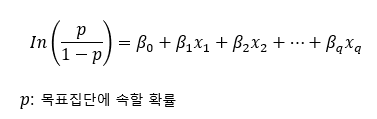
  - __목표집단에 속할 확률 자체를 출력하지 않음__
  - __목표집단에 속할 확률과 목표집단에 속하지 않을 확률의 비율에 자연로그(ln)를 취한 값__을 출력하여 분류예측 수행

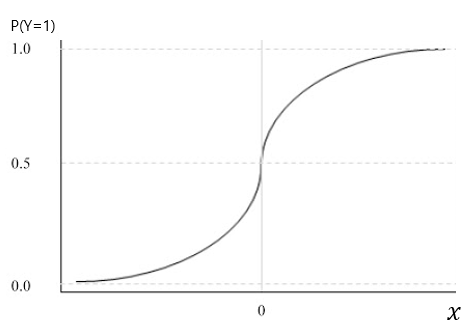

   - 독립변수가 증가함에 따라 종속변수의 값이 일정하게 증가하는 것이 아님
   - 독립변수의 일정수준까지는 서서히 증가하다가, 일정 수준이 지나면 급격하게 종속변수의 값이 상승하는 형태
   - __분류기준값__을 설정하고(이항 로지스틱 회귀분석의 경우 0.5),  
   목표집단에 속할 확률인 P(Y=1)이 분류기준값보다 클 경우 집단1(목표집단)으로, 작을 경우 집단 0으로 분류


- __로짓함수와 오즈__
  - 만약, 로짓함수가 아닌 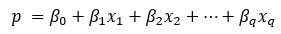  
  와 같이 단순히 독립변수들의 선형적인 결합으로 __특정집단에 속할 확률 p를 직접 추정한다면,  
  0과 1사이의 값을 갖지 않을 수도 있음__
- 따라서, 좌변항이 0과 1사이의 값을 취하기 위해서는 __비선형 함수 형태로 변환__해야 함
 - 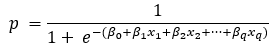
 - 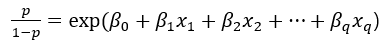
- __오즈(Odds)__ = 좌변항. 특정사건이 발생할 확률(p)와 발생하지 않을 확률(1-p)의 비율
  - 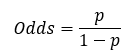
  - 그러나 로지스틱 회귀분석에 오즈를 종속변수로 그대로 사용하지 않음
    + p의 값이 1에 무한대로 가까워질 때, p의 값은 무한대로 커지기 때문
  - 그래서 __오즈에 자연로그를 취함__
  - 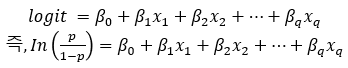
  - 독립변수의 계수만큼 오즈가 증가하는 것이 아닌, 로짓이 증가하는 것
  - __오즈비__: 독립변수 x의 로지스틱 회귀계수 β를 exp(β)로 변환시킨 값
  - 예: 고객의 이탈여부 예측하는 로지스틱 회귀모형에서 독립변수 = 반품횟수,  
  이 독립변수의 회귀계수가 0.2이면,  
  반품횟수가 1단위 증가할 때 오즈가 0.2배 증가하는 것 X  
  오즈비인 exp(0.2) = 1.22배 만큼 증가


- __로지스틱 회귀계수 추정 방법__
 - LSM(Least Squeares Method): 일반 선형회귀에서 회귀계수를 추정하기 위해 예측 값과 실제 값의 오차 제곱의 합을 최소로 하는 최소자승법
 - MLE(Maximum Likelihood Estimation): 로지스틱 회귀분석에서 우도함수를 최대화하는 최대우도법
  + Likelihood = 주어진 표본이 나타날 모수의 가능성
  + 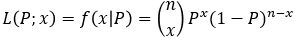

- __로지스틱 회귀모형의 적합도 검정__
  - __우도비 검정__
    + 우도비 검정 = Log Likelihood ratio test
    + 선형 회귀모형에서 모형의 적합도를 판정하는 F검정과 유사한 개념
    + 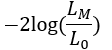
    + 최대우도값과 최소우도값을 우도비로 나타내고, 해석의 편의성을 위해 -2로그를 취하여 카이제곱 분포로 변환하여 판단
    + 모델의 적합도가 좋아질수록 0에 가까워지며, 적합도가 나빠질 수록 커지게 됨
  - __Hosmer & Lemeshow 검정__
    + 전체사례들의 확률값을 순위화하여 10개의 그룹으로 분류한 후 각 그룹의 기대 확률과 실제 관측 확률 값을 비교하는 방식. 카이제곱 검정방식과 유사.
    + p<0.05일 경우, 모델에서 추정된 값은 실측값과 차이가 없다는 귀무가설 기각. 추정된 로지스틱 회귀모형이 주어진 표본자료에 적합하지 않음을 의미
  - __유사 결정계수__
    + 유사 결정계수 = Pseudo-R² 
    + 선형 회귀분석에서 종속변수의 분산에 대한 설명력을 나타내는 결정계수(R²)의 개념에 로그우도함수 값을 취한 결정계수
    + 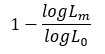
    + 0 ~ 1 사이의 값으로 산출. 1에 가까울 수록 좋은 모형 적합도를 갖음

## 3.2.분석 및 해석
- 쇼핑몰 거래기간, Recency, 성별을 이용하여 이탈 예측모형 만들고자 함
- 성별은 명목형 변수이므로 로지스틱 회귀분석을 사용하여야 함
- 귀무가설 = 거래기간, Recency, 성별은 이탈에 영향을 주지 않는다
- 연구가설 = 거래기간, Recency, 성별은 이탈에 영향을 준다

In [6]:
import statsmodels.api as sm
pd.options.display.float_format = '{:3f}'.format
df = pd.read_csv('/content/gdrive/My Drive/통계/Ashopping.csv',sep=',',encoding='CP949')
df.head()

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,구매_카테고리_수,거주지역,성별,고객_나이대,거래기간,할인민감여부,멤버쉽_프로그램_가입전_만족도,멤버쉽_프로그램_가입후_만족도,Recency,Frequency,Monetary,상품_만족도,매장_만족도,서비스_만족도,상품_품질,상품_다양성,가격_적절성,상품_진열_위치,상품_설명_표시,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,6,6,1,4,1079,0,5,7,7,3,4,6,5,6,7,7,6,7.000000,6.000000,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,4,0,4,4,1,1,537,0,2,3,2,3,3,2,5,4,6,7,6,6.000000,nan,7,7,6,6,6,5,3,6,6,6
2,3,0,2680780,18,148932,6,186045,1,4,1,6,6,1,6,1080,0,6,6,7,3,2,4,6,7,6,7,6,7.000000,nan,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,4,1,5,5,1,6,1019,0,3,5,7,3,5,3,5,5,6,6,6,5.000000,6.000000,6,6,5,6,6,6,6,6,5,6
4,5,0,13745950,73,188301,9,246350,1,2,0,6,6,0,6,1086,0,5,6,7,6,7,5,6,6,5,6,6,5.000000,6.000000,5,6,6,6,5,5,6,6,5,6


In [10]:
# 더미변수 생성하기
df2 = pd.get_dummies(df['성별'],prefix = '성별', drop_first = False)
df3 = pd.concat([df,df2],axis = 1)
df2.head()

,성별_0,성별_1
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0


- 명목형 변수인 '성별'은 get_dummies 함수를 이용하여 더미변수로 만들어 줌
- drop_first = False일경우 두 가지 성별에 대해 더미변수를 생성


In [28]:
# 종속변수와 독립변수 구분하기
df3['intercept'] = 1
x = df3[['intercept','거래기간','Recency','성별_0']]
y = df3[['이탈여부']]
x.head()

,intercept,거래기간,Recency,성별_0
0,1,1079,7,0
1,1,537,2,0
2,1,1080,7,0
3,1,1019,7,0
4,1,1086,7,1


In [29]:
# 로지스틱 회귀분석 실행하기
logit = sm.Logit(y,x).fit()

Optimization terminated successfully.
         Current function value: 0.015583
         Iterations 12


- 로지스틱 회귀분석을 지원하는 Logit()함수 사용
- Logit(종속변수, 독립변수)함수를 사용하기 위해 절편 값(Intercept)을 1로 설정
- 독립변수에 절편, 거래기간, Recency, 성별 지정
- 종속변수에 이탈여부 지정


In [33]:
# 분석결과 출력하기
logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.937     
Dependent Variable: 이탈여부             AIC:              39.1656   
Date:               2020-10-27 06:26 BIC:              58.7966   
No. Observations:   1000             Log-Likelihood:   -15.583   
Df Model:           3                LL-Null:          -245.81   
Df Residuals:       996              LLR p-value:      1.7725e-99
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     12.0000                                      
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
intercept     19.1980    4.0839   4.7009  0.0000  11.1937  27.2022
거래기간          -0.0204    0.0052  -3.9300  0.0001  -0.0306  -0.0102
Recency       -1.2554    0.3561  -3.5257  0.0004  -1.9533  -0.5575
성별_0          -2.0203    1.2193  -1.6569  0.0975  -4.4100   0.3695
=================================================================

"""

- Pseudo R-squared는 0.937로 매우 유의한 모형으로 나타남
- Df Model(매개변수 수) = 3 
- Df Residuals(잔차의 자유도) = 996 

- std.Err. = 계수 추정치의 기본 표준오차
- z통계량 = 선형회귀분석의 t-통계량과 같은 역할
- p>|z| = 유의확률
- [0.025	0.975]와 같이 95% 신뢰 구간의 하한값과 상한값을 제시

In [32]:
# 오즈비 출력하기
np.exp(logit.params)

intercept   217558462.691823
거래기간                0.979795
Recency             0.284960
성별_0                0.132622
dtype: float64

- 독립변수가 1단위 변할 때 종속변수에 주는 영향도를 판단
- Recency의 오즈비 0.285 = Recency의 값이 1만큼 상승할 때, 이탈 확률은 0.285배가 되어 점점 감소

In [31]:
# 분류행렬표
cf_m2 = pd.DataFrame(logit.pred_table())
cf_m2.columns = ['예측 0','예측 1']
cf_m2.index= ['실제 0', '실제 1']
cf_m2

,예측 0,예측 1
실제 0,930.000000,3.000000
실제 1,3.000000,64.000000


- 모형의 정확도: 99.4%

- _결과해석__
  - 유사 결정계수(Pseudo R²)의 값이 0.936으로 매우 좋은 적합도를 보임
  - 각 변수는 유의수준 0.1 기준으로 하였을 때, 모두 유의하여 이탈에 영향을 주고 있다는 연구가설을 채택가능. 절편 또한 유의
  - 오즈비 테이블을 통해 __변수의 값이 1단위씩 커질 때마다 이탈할 확률이 점점 낮아짐__을 알 수 있음
  - __이탈여부에 대한 독립변수의 영향력은 성별> Recency>거래기간__의 순서로 이탈위험도에 __부정적인 영향__을 주는 것으로 나타남
  - 즉, __'남성 + 구매 최근성 낮음 + 총 거래기간 오래됨'__인 고객일수록 이탈 위험도가 높음